<a href="https://colab.research.google.com/github/mishiruv/EVA5/blob/master/EVA5S6_Mayank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-10.0, 10.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset and Creating Train/Test Split

In [4]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [10]:
# # We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_data = train.train_data
# train_data = train.transform(train_data.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

# dataiter = iter(train_loader)
# images, labels = dataiter.next()

# print(images.shape)
# print(labels.shape)

# # Let's visualize some of the images

# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [11]:
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [12]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model
Let's start with the model we first saw

In [13]:
dropout_value = 0.00
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
       BatchNorm2d-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
      BatchNorm2d-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Ghost Batch normalization

In [15]:
class BatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-05, momentum=0.1, weight=True, bias=False):
        super().__init__(num_features, eps=eps, momentum=momentum)
        self.weight.data.fill_(1.0)
        self.bias.data.fill_(0.0)
        self.weight.requires_grad = weight
        self.bias.requires_grad = bias

In [16]:
class GhostBatchNorm(BatchNorm):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits
        self.register_buffer('running_mean', torch.zeros(num_features * self.num_splits))
        self.register_buffer('running_var', torch.ones(num_features * self.num_splits))

    def train(self, mode=True):
        if (self.training is True) and (mode is False):  # lazily collate stats when we are going to use them
            self.running_mean = torch.mean(self.running_mean.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
            self.running_var = torch.mean(self.running_var.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
        return super().train(mode)

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            return F.batch_norm(
                input.view(-1, C * self.num_splits, H, W), self.running_mean, self.running_var,
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W)
        else:
            return F.batch_norm(
                input, self.running_mean[:self.num_features], self.running_var[:self.num_features],
                self.weight, self.bias, False, self.momentum, self.eps)

In [17]:
class NetWithGBN(nn.Module):
    def __init__(self, dropout_value: int):
        super(NetWithGBN, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10,2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [18]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = NetWithGBN(dropout_value=0.0).to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
    GhostBatchNorm-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
    GhostBatchNorm-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
   GhostBatchNorm-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [19]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = F.nll_loss(y_pred, target)

      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()

      # Learning rate for onecycle LR # Vamsi - added
      # scheduler.step()

      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)

      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)

  def test(self, model, device, test_loader):
      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
              pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      self.test_losses.append(test_loss)

      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
      
      self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)

  def get_misclassified(self, model, test_loader, device):
    misclassified = []
    misclassified_pred = []
    misclassified_target = []
    # put the model to evaluation mode
    model.eval()
    # turn off gradients
    with torch.no_grad():
        for data, target in test_loader:
          # move them to the respective device
          data, target = data.to(device), target.to(device)
          # do inferencing
          output = model(data)
          # get the predicted output
          pred = output.argmax(dim=1, keepdim=True)

          # get the current misclassified in this batch
          list_misclassified = (pred.eq(target.view_as(pred)) == False)
          batch_misclassified = data[list_misclassified]
          batch_mis_pred = pred[list_misclassified]
          batch_mis_target = target.view_as(pred)[list_misclassified]

          misclassified.append(batch_misclassified)
          misclassified_pred.append(batch_mis_pred)
          misclassified_target.append(batch_mis_target)

    # group all the batched together
    misclassified = torch.cat(misclassified)
    misclassified_pred = torch.cat(misclassified_pred)
    misclassified_target = torch.cat(misclassified_target)

    return list(map(lambda x, y, z: (x, y, z), misclassified, misclassified_pred, misclassified_target))

In [20]:
def plot_metrics(train_losses, train_acc, test_losses, test_acc):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")

def plot_misclassification(misclassified):
    print('Total Misclassifications : {}'.format(len(misclassified)))
    num_images = 25
    fig = plt.figure(figsize=(14, 16))
    fig.suptitle('Misclassifications')
    for idx, (image, pred, target) in enumerate(misclassified[:num_images]):
        image, pred, target = image.cpu().numpy(), pred.cpu(), target.cpu()
        ax = fig.add_subplot(5, 5, idx+1)
        ax.axis('off')
        ax.set_title('target {}\npred {}'.format(target.item(), pred.item()), fontsize=12)
        ax.imshow(image.squeeze())
    plt.show()

# Let's Train and test our model

In [21]:
from torch.optim.lr_scheduler import StepLR,OneCycleLR

In [22]:
model_gbn =  NetWithGBN(dropout_value=0.01).to(device)
model_bn =  Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-3)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.09650363773107529 Batch_id=468 Accuracy=85.75: 100%|██████████| 469/469 [00:22<00:00, 20.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1019, Accuracy: 9791/10000 (97.91%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.09480420500040054 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:22<00:00, 20.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0732, Accuracy: 9856/10000 (98.56%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.0689115896821022 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:23<00:00, 20.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0914, Accuracy: 9834/10000 (98.34%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.11393537372350693 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:23<00:00, 20.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0529, Accuracy: 9898/10000 (98.98%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.10847172141075134 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0603, Accuracy: 9868/10000 (98.68%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.15541276335716248 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:22<00:00, 20.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0726, Accuracy: 9837/10000 (98.37%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.02485176920890808 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:22<00:00, 20.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 9935/10000 (99.35%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.043556198477745056 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9939/10000 (99.39%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.07457505911588669 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:23<00:00, 20.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9941/10000 (99.41%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.05343519151210785 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:23<00:00, 20.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9931/10000 (99.31%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.048270318657159805 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9942/10000 (99.42%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.0660814568400383 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9934/10000 (99.34%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.05099773779511452 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:23<00:00, 20.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9942/10000 (99.42%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.0292216669768095 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:23<00:00, 20.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0324, Accuracy: 9944/10000 (99.44%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.025656683370471 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:22<00:00, 20.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9947/10000 (99.47%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.04034760221838951 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 20.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9950/10000 (99.50%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.06351307779550552 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9948/10000 (99.48%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03900673985481262 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9939/10000 (99.39%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.025592362508177757 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9947/10000 (99.47%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.05314262583851814 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9942/10000 (99.42%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.04115888848900795 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0315, Accuracy: 9946/10000 (99.46%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.024098509922623634 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9942/10000 (99.42%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.04197028651833534 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:22<00:00, 20.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0318, Accuracy: 9947/10000 (99.47%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.06999305635690689 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 20.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9945/10000 (99.45%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.0728919580578804 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.71it/s]



Test set: Average loss: 0.0313, Accuracy: 9943/10000 (99.43%)

Total Misclassifications : 57


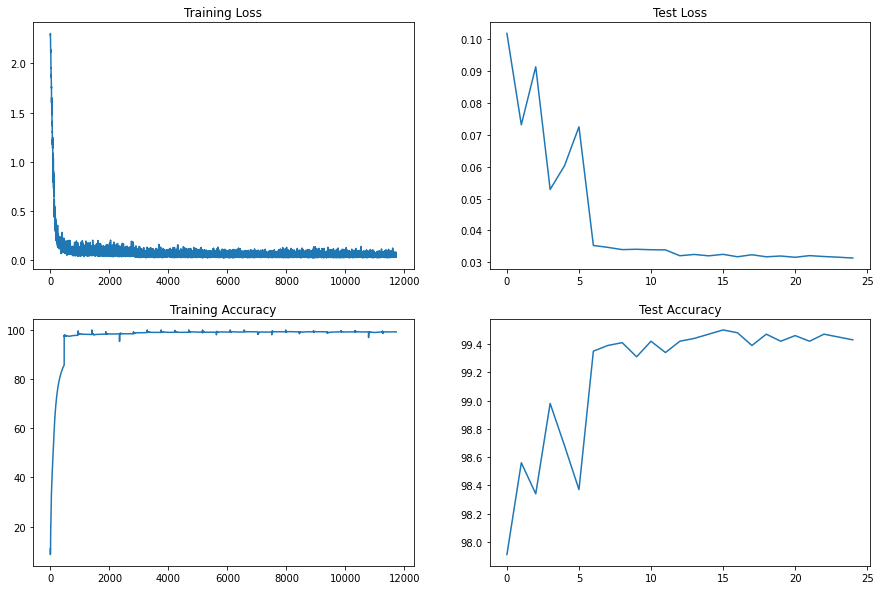

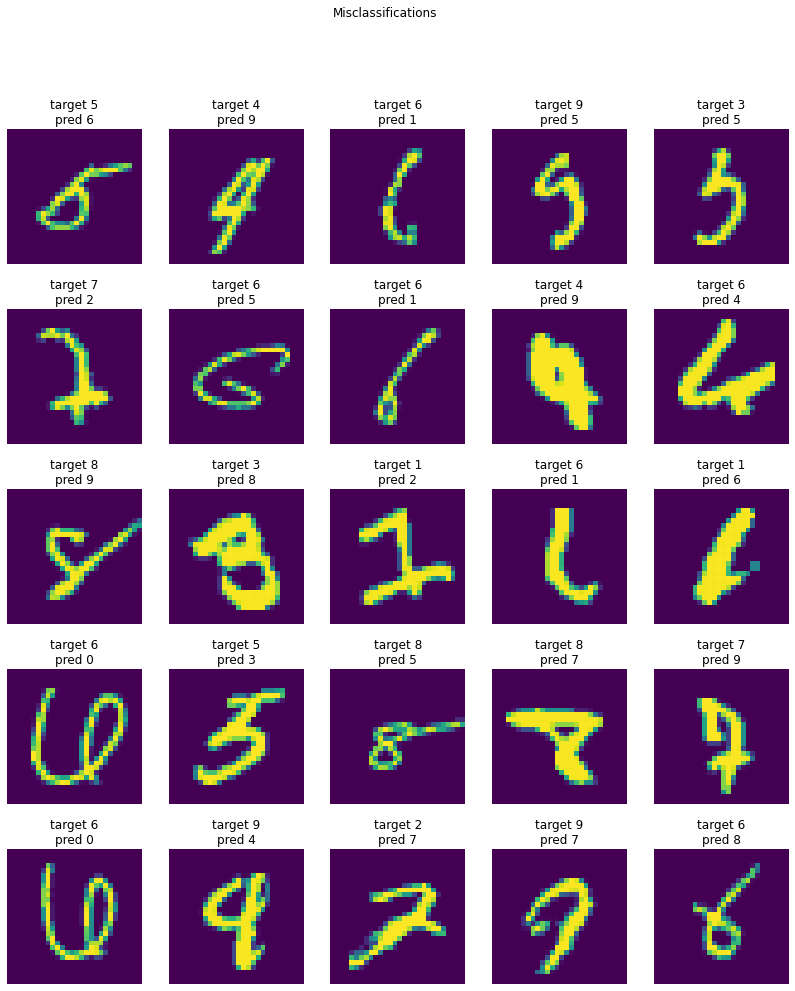

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.3466190695762634 Batch_id=468 Accuracy=88.42: 100%|██████████| 469/469 [00:22<00:00, 20.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1010, Accuracy: 9748/10000 (97.48%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.27975142002105713 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:22<00:00, 20.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0833, Accuracy: 9741/10000 (97.41%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2468237578868866 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:22<00:00, 20.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1167, Accuracy: 9637/10000 (96.37%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.273721843957901 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:22<00:00, 20.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0757, Accuracy: 9813/10000 (98.13%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20322783291339874 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0492, Accuracy: 9855/10000 (98.55%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.22052675485610962 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:22<00:00, 20.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9845/10000 (98.45%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.259774774312973 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:22<00:00, 20.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9936/10000 (99.36%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1887953281402588 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9941/10000 (99.41%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1681942343711853 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:22<00:00, 20.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9938/10000 (99.38%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14304061233997345 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:22<00:00, 20.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9939/10000 (99.39%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.2904793620109558 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:22<00:00, 20.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9944/10000 (99.44%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14596496522426605 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:22<00:00, 21.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.14743159711360931 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:22<00:00, 20.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9950/10000 (99.50%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13150544464588165 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 20.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9945/10000 (99.45%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.17099009454250336 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 21.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9946/10000 (99.46%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.15924346446990967 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 20.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9943/10000 (99.43%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.15291611850261688 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9950/10000 (99.50%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.21888551115989685 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 21.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9945/10000 (99.45%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.1588425189256668 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:28<00:00, 16.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9944/10000 (99.44%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.142315074801445 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:24<00:00, 19.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9946/10000 (99.46%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.17150063812732697 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 19.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9944/10000 (99.44%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1443295180797577 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:23<00:00, 19.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9947/10000 (99.47%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.15139850974082947 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:24<00:00, 19.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9945/10000 (99.45%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.19656524062156677 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9949/10000 (99.49%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.17142578959465027 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:23<00:00, 19.64it/s]



Test set: Average loss: 0.0191, Accuracy: 9950/10000 (99.50%)

Total Misclassifications : 50


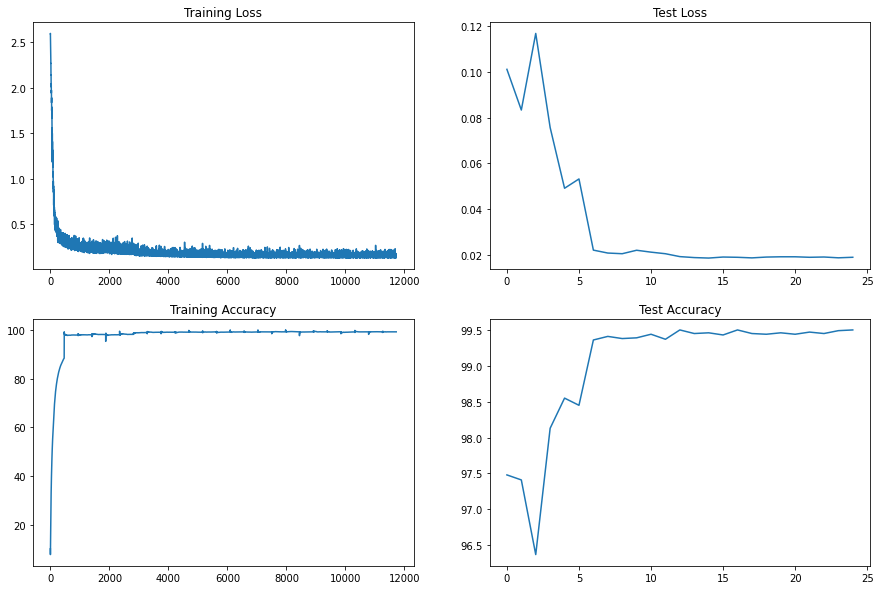

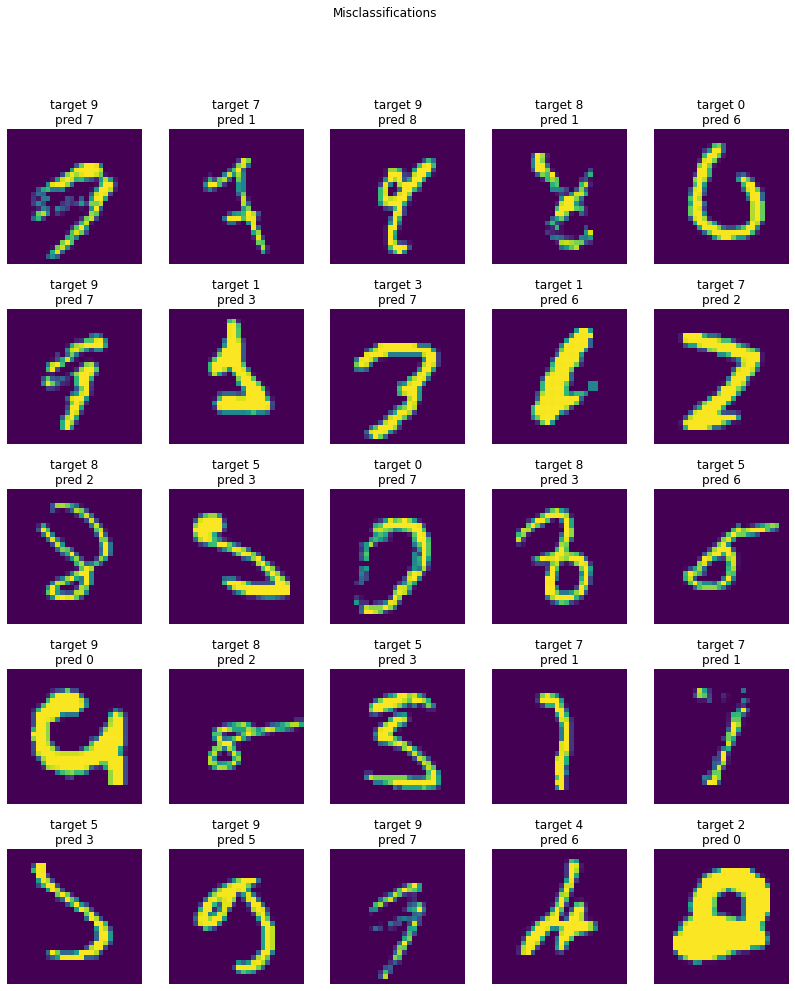

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.3463284969329834 Batch_id=468 Accuracy=88.31: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1053, Accuracy: 9800/10000 (98.00%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.25298798084259033 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:23<00:00, 19.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1186, Accuracy: 9754/10000 (97.54%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20577706396579742 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:23<00:00, 19.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1133, Accuracy: 9746/10000 (97.46%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2722148001194 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:23<00:00, 20.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0623, Accuracy: 9876/10000 (98.76%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20252174139022827 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:23<00:00, 20.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9850/10000 (98.50%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1451602578163147 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:23<00:00, 20.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1155, Accuracy: 9733/10000 (97.33%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.1627679169178009 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:23<00:00, 19.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9930/10000 (99.30%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.13905061781406403 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:23<00:00, 19.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0361, Accuracy: 9928/10000 (99.28%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1441095471382141 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:23<00:00, 19.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 9932/10000 (99.32%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.11883719265460968 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:23<00:00, 20.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 9928/10000 (99.28%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.13644085824489594 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9927/10000 (99.27%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1487189084291458 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9928/10000 (99.28%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.11648371815681458 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9934/10000 (99.34%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13294488191604614 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9937/10000 (99.37%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.11673139035701752 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:23<00:00, 19.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9939/10000 (99.39%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.10484626144170761 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9940/10000 (99.40%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.107770174741745 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:23<00:00, 20.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9940/10000 (99.40%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13743135333061218 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9936/10000 (99.36%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.10270427167415619 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9938/10000 (99.38%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.13305099308490753 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:23<00:00, 19.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9935/10000 (99.35%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1300923079252243 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9935/10000 (99.35%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1083458811044693 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9938/10000 (99.38%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.14966095983982086 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9937/10000 (99.37%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1705242395401001 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:23<00:00, 19.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9936/10000 (99.36%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.10062425583600998 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:24<00:00, 19.21it/s]



Test set: Average loss: 0.0337, Accuracy: 9936/10000 (99.36%)

Total Misclassifications : 64


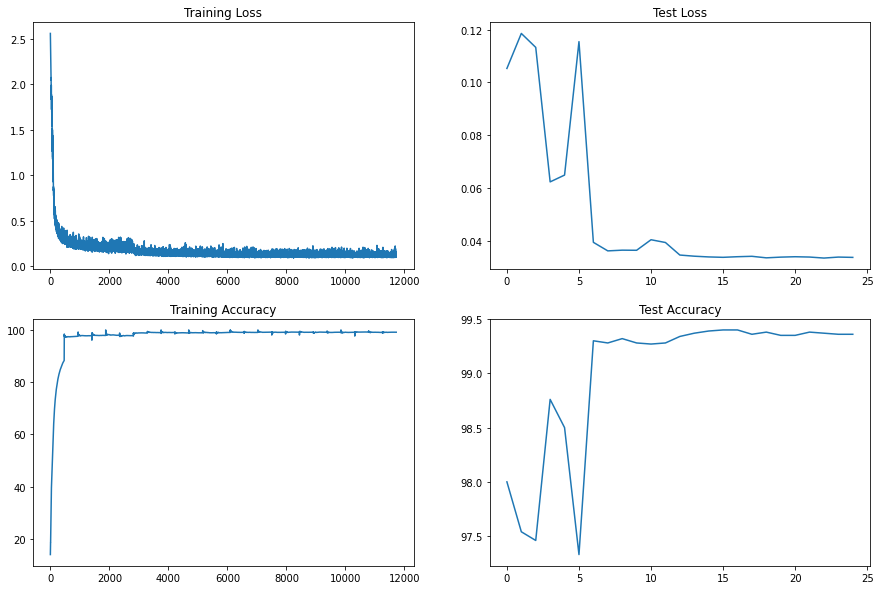

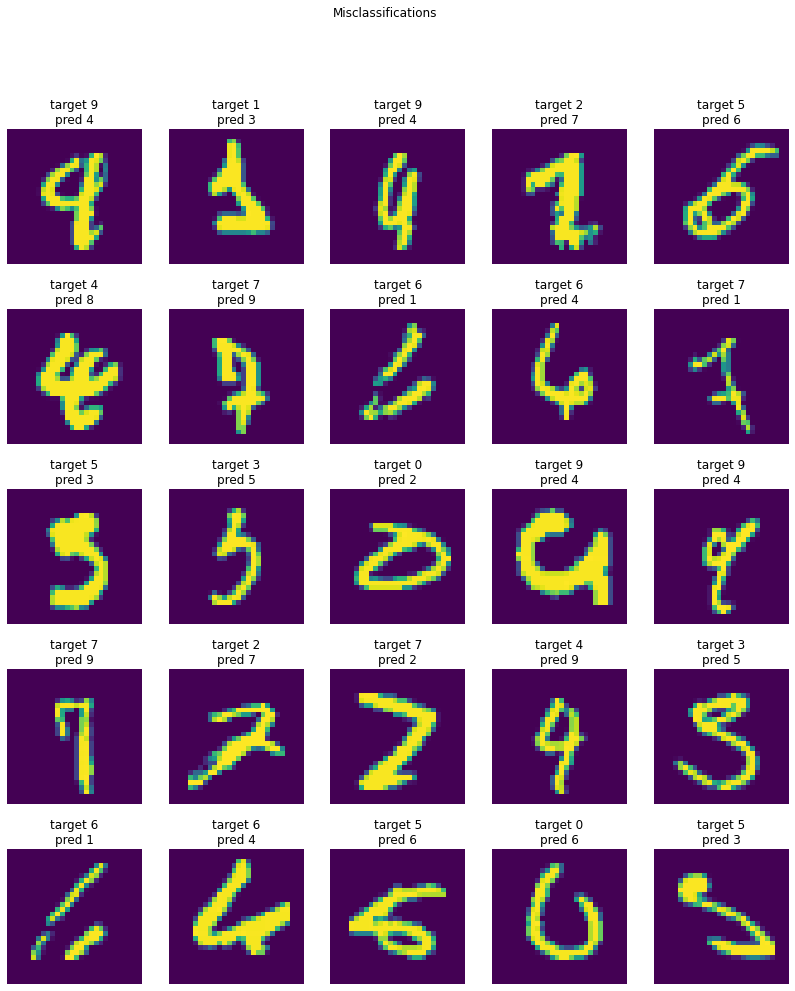

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.19535930454730988 Batch_id=468 Accuracy=86.25: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1715, Accuracy: 9506/10000 (95.06%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.22778542339801788 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:24<00:00, 19.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9818/10000 (98.18%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.02132275700569153 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:23<00:00, 19.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9904/10000 (99.04%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.014301620423793793 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:23<00:00, 19.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9914/10000 (99.14%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.10164636373519897 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9903/10000 (99.03%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.030889354646205902 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 9925/10000 (99.25%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.030411893501877785 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9936/10000 (99.36%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.046111006289720535 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:23<00:00, 19.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9949/10000 (99.49%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.06529989093542099 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9941/10000 (99.41%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.02851882018148899 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.033946651965379715 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:24<00:00, 19.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9942/10000 (99.42%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.009690577164292336 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:24<00:00, 19.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9946/10000 (99.46%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.048690248280763626 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:24<00:00, 19.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9947/10000 (99.47%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.09819520264863968 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:24<00:00, 19.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.02343658171594143 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9946/10000 (99.46%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.08067047595977783 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:24<00:00, 19.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9947/10000 (99.47%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03727710619568825 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:23<00:00, 19.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9946/10000 (99.46%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.025606239214539528 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:23<00:00, 19.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.0049701351672410965 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:24<00:00, 19.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9945/10000 (99.45%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.031150905415415764 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:23<00:00, 19.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.03907141089439392 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9947/10000 (99.47%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.01554366946220398 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:24<00:00, 19.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9944/10000 (99.44%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.019720526412129402 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:24<00:00, 19.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9945/10000 (99.45%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.03805077075958252 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:24<00:00, 19.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.06150918826460838 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:24<00:00, 18.90it/s]



Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

Total Misclassifications : 55


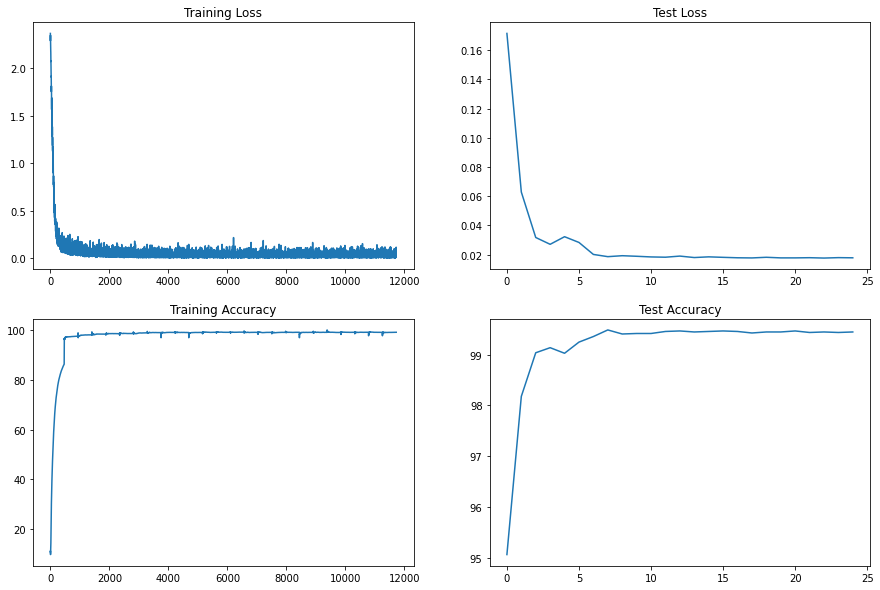

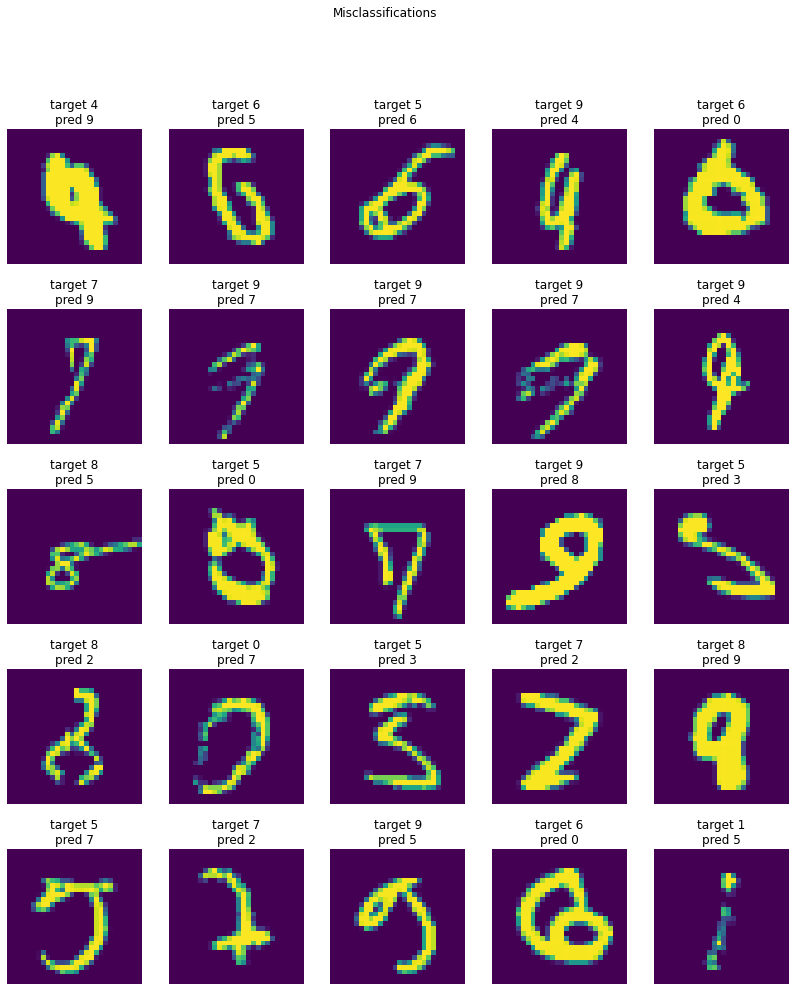

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.34358230233192444 Batch_id=468 Accuracy=84.53: 100%|██████████| 469/469 [00:24<00:00, 19.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1573, Accuracy: 9631/10000 (96.31%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.350174218416214 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:24<00:00, 18.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0681, Accuracy: 9837/10000 (98.37%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.19189481437206268 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:25<00:00, 18.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0776, Accuracy: 9828/10000 (98.28%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.19870030879974365 Batch_id=468 Accuracy=97.66: 100%|██████████| 469/469 [00:24<00:00, 19.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0931, Accuracy: 9756/10000 (97.56%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20092454552650452 Batch_id=447 Accuracy=97.51:  95%|█████████▌| 446/469 [00:23<00:01, 17.74it/s]

Buffered data was truncated after reaching the output size limit.

In [23]:
trail_iterations = [('bn_l1', model_bn, 5e-3, 0), ('bn_l2', model_bn, 0, 5e-4), ('bn_l1_l2', model_bn,5e-3, 5e-4) , 
                    ('gbn', model_gbn,0,0), ('gbn_l1_l2', model_gbn, 5e-3, 5e-4)]

metric_acc_values = []
metric_loss_values = []

for i, trail in enumerate(trail_iterations):
  print("\n-----------------------------------------------")
  print("\n-----------------------------------------------")
  print(trail[0])
  EPOCHS = 25
  if i in (0,1,2):
    myModel = Net().to(device)
  else:
    myModel = NetWithGBN(0.01).to(device)
  optimizer = optim.SGD(myModel.parameters(), lr=0.01, momentum=0.9, weight_decay=trail[2])
  scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

  trainer = Trainer()

  for epoch in range(EPOCHS):
      print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
      # def train(model, device, train_loader, optimizer, epoch, lambda_l1):
      trainer.train(myModel, device, train_loader, optimizer, epoch, trail[3])
      trainer.test(myModel, device, test_loader)
      scheduler.step() # for StepLR

  (train_losses, test_losses, train_acc, test_acc) = trainer.getValues()

  plot_metrics(train_losses, train_acc, test_losses, test_acc)
  metric_acc_values.extend([test_acc])
  metric_loss_values.extend([test_losses])
  # get_misclassified(self, model, test_loader, device):
  misclassifications = trainer.get_misclassified(myModel, test_loader, device)
  plot_misclassification(misclassified=misclassifications)

In [24]:
def plot_acc_loss(acc_loss, msg):
    plt.figure(figsize=(12,12))
    plt.plot(acc_loss[0],color='Red',   label='BN_L1')
    plt.plot(acc_loss[1],color='Blue',     label='BN_L2')
    plt.plot(acc_loss[2],color='Green',    label='BN_L1_L2')
    plt.plot(acc_loss[3],color='Yellow',  label='GBN')
    plt.plot(acc_loss[4],color='Black', label='GBN_L1_L2')
        
    plt.xlabel(' Epochs ')

    if msg == 'Loss':
        plt.ylabel(' Loss ')
        plt.title('Total losses vs Epochs')
    elif msg == 'Acc':
        plt.ylabel(' Accuracy ')
        plt.title('Total accuracy vs Epochs')

    plt.legend(loc = 'upper left' , bbox_to_anchor = (1,1))
    plt.legend()
    
    plt.show()

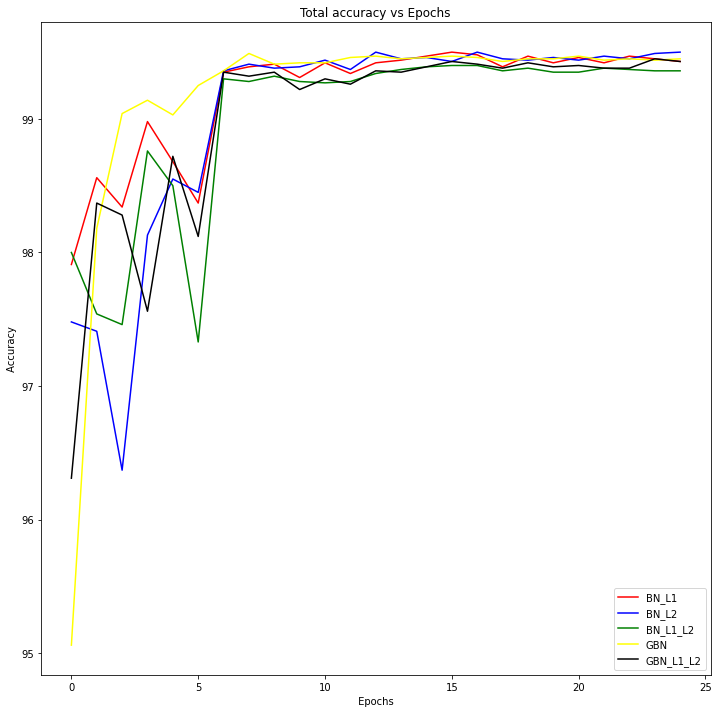

In [25]:
plot_acc_loss(metric_acc_values, "Acc")

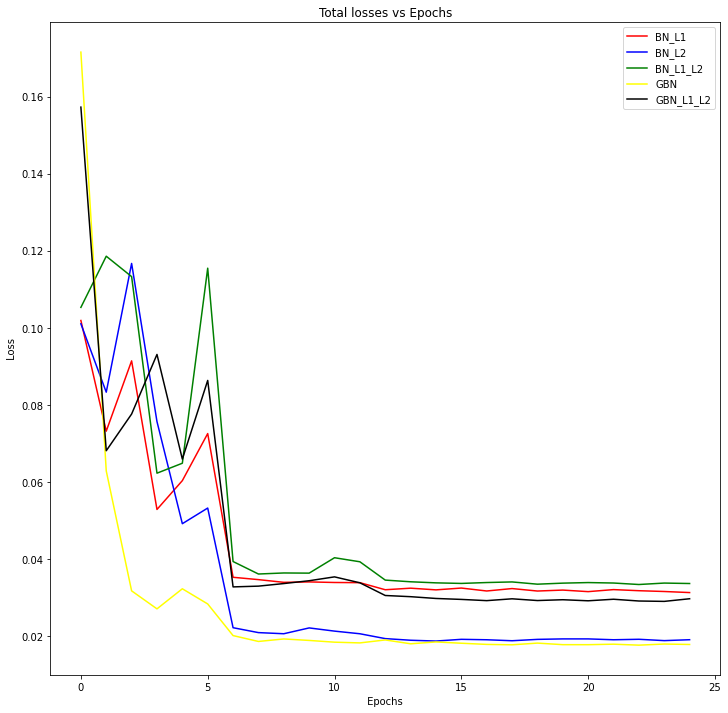

In [26]:
plot_acc_loss(metric_loss_values, "Loss")

In [27]:
metric_loss_values

[[0.10190025548934936,
  0.07318936503827572,
  0.0914267335653305,
  0.05287213681936264,
  0.060348255300521854,
  0.07255941210389137,
  0.03527268908619881,
  0.03466471119821072,
  0.03396224383115769,
  0.03406932438015938,
  0.033922724395990374,
  0.03387433302551508,
  0.03203930160403252,
  0.032443924477696416,
  0.03200764473974705,
  0.032476274421811106,
  0.03171559780836106,
  0.032344820070266726,
  0.03170547037124634,
  0.03195171850919724,
  0.031547686353325846,
  0.032075013683736324,
  0.031788618057966234,
  0.031583271193504334,
  0.031307226444780824],
 [0.10104424297213555,
  0.08329945327043534,
  0.11670370140075684,
  0.07566883689463139,
  0.049176330471038816,
  0.053235565662384035,
  0.022189459088444708,
  0.020916710525751114,
  0.020623955786600708,
  0.022133302041888236,
  0.021303534910082817,
  0.020618429827690125,
  0.01935980264227837,
  0.018936899952217937,
  0.018728353597596288,
  0.019174239768087863,
  0.01906166493585333,
  0.018807830

In [28]:
metric_acc_values

[[97.91,
  98.56,
  98.34,
  98.98,
  98.68,
  98.37,
  99.35,
  99.39,
  99.41,
  99.31,
  99.42,
  99.34,
  99.42,
  99.44,
  99.47,
  99.5,
  99.48,
  99.39,
  99.47,
  99.42,
  99.46,
  99.42,
  99.47,
  99.45,
  99.43],
 [97.48,
  97.41,
  96.37,
  98.13,
  98.55,
  98.45,
  99.36,
  99.41,
  99.38,
  99.39,
  99.44,
  99.37,
  99.5,
  99.45,
  99.46,
  99.43,
  99.5,
  99.45,
  99.44,
  99.46,
  99.44,
  99.47,
  99.45,
  99.49,
  99.5],
 [98.0,
  97.54,
  97.46,
  98.76,
  98.5,
  97.33,
  99.3,
  99.28,
  99.32,
  99.28,
  99.27,
  99.28,
  99.34,
  99.37,
  99.39,
  99.4,
  99.4,
  99.36,
  99.38,
  99.35,
  99.35,
  99.38,
  99.37,
  99.36,
  99.36],
 [95.06,
  98.18,
  99.04,
  99.14,
  99.03,
  99.25,
  99.36,
  99.49,
  99.41,
  99.42,
  99.42,
  99.46,
  99.47,
  99.45,
  99.46,
  99.47,
  99.46,
  99.43,
  99.45,
  99.45,
  99.47,
  99.44,
  99.45,
  99.44,
  99.45],
 [96.31,
  98.37,
  98.28,
  97.56,
  98.72,
  98.12,
  99.35,
  99.32,
  99.35,
  99.22,
  99.3,
  99.26